In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
from Bio import SeqIO, Seq
import Bio
from collections import Counter

#makes viewing pandas tables better
# pd.set_option('display.max_colwidth', 0)



In [2]:
df = pd.read_csv('30_to_41_pools_poolfile_combined_annotated.csv')

In [3]:
print('Total barcodes: {}'.format(len(df['barcode'].unique())))

Total barcodes: 270652


In [4]:
#if you don't want to filter by read count, set min_read_count_per_barcode = 1

min_read_count_per_barcode = 2
df = df[df['nMainLocation'] >= min_read_count_per_barcode]

print('Barcodes with at least {} reads (to be used in further analysis): {}'.format(min_read_count_per_barcode, df.shape[0]))

Barcodes with at least 2 reads (to be used in further analysis): 100388


In [5]:
print('Number of barcodes mapping to the Kl genome: {}'.format(df[df['scaffold'].str.contains('kl')].shape[0]))
print('Number of barcodes mapping to the Km genome: {}'.format(df[df['scaffold'].str.contains('km')].shape[0]))
print('Number of barcodes with at least one read mapping to the insertion sequence: {}'.format(df[df['nInsert']>0].shape[0]))


Number of barcodes mapping to the Kl genome: 0
Number of barcodes mapping to the Km genome: 0
Number of barcodes with at least one read mapping to the insertion sequence: 548


### Plot barcode count vs. chromosome position

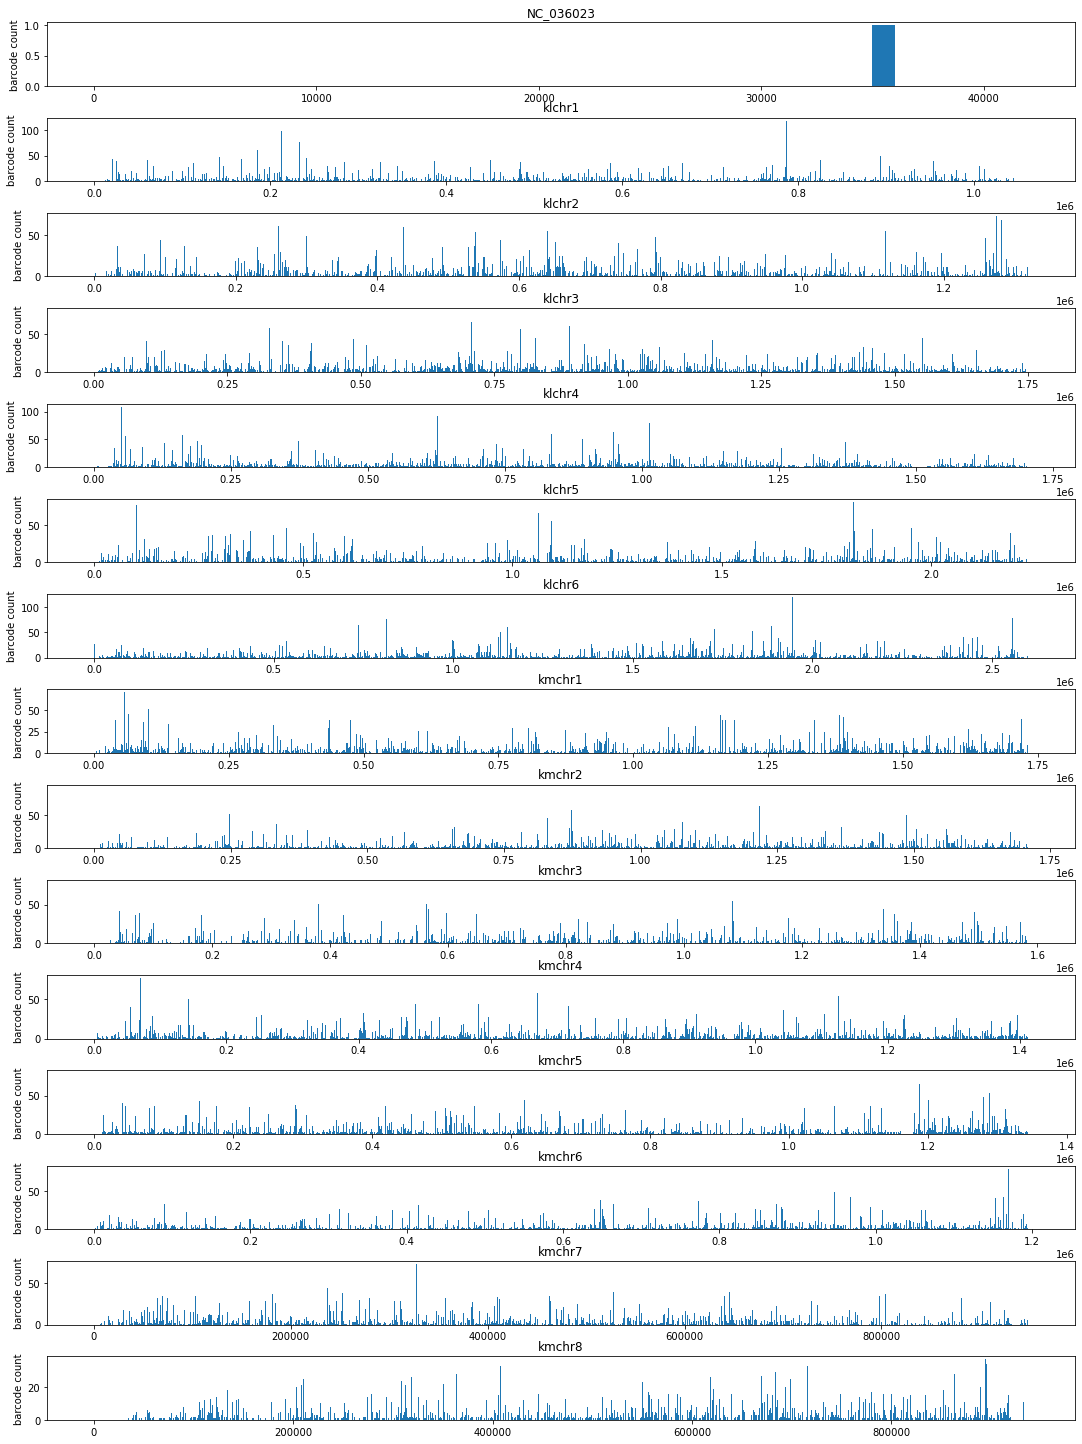

In [187]:
scaffolds = sorted(df['scaffold'].unique())

fig, ax = plt.subplots(len(scaffolds), figsize=(15,20))
plt.tight_layout()

for i, scaffold in enumerate(scaffolds):
    
    temp = df[df['scaffold']==scaffold]
    ax[i].hist(temp['pos'], bins=np.arange(0,max(temp['pos']),1000))
    ax[i].set_title(scaffold)
    ax[i].set_ylabel('barcode count')
    
plt.show()

### Plot inserts per gene

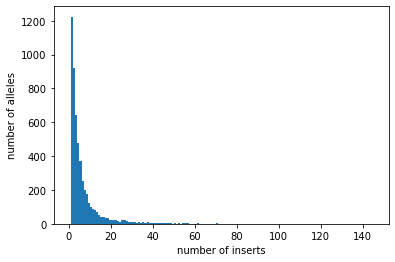

In [188]:
inserts_per_gene = df.groupby('gene').count()['barcode']

plt.hist(inserts_per_gene, bins=np.arange(0, max(inserts_per_gene)))
plt.xlabel('number of inserts')
plt.ylabel('number of alleles')
plt.show()

km # of genes with at least 5 inserts: 1064
kl # of genes with at least 5 inserts: 562


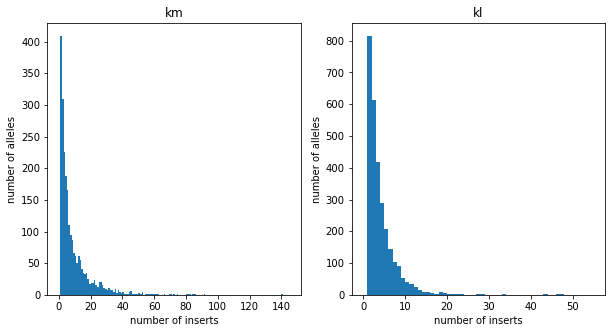

In [189]:
fig, ax = plt.subplots(1,2, figsize=(10,5))



for i, sp in enumerate(['km', 'kl']):
    
    temp = df[df['scaffold'].str.contains(sp)]

    inserts_per_gene = temp.groupby('gene').count()['barcode']

    print('{} # of genes with at least 5 inserts: {}'.format(sp, inserts_per_gene[inserts_per_gene > 5].shape[0]))
    
    ax[i].hist(inserts_per_gene, bins=np.arange(0, max(inserts_per_gene)))
    ax[i].set_xlabel('number of inserts')
    ax[i].set_ylabel('number of alleles')
    ax[i].set_title(sp)
    
plt.show()

In [190]:
inserts_per_gene = df.groupby('gene').count()['barcode']
min_5_inserts = inserts_per_gene[inserts_per_gene > 5].index.tolist()

gene_name_only = [allele.replace('km','').replace('kl','') for allele in min_5_inserts]
allele_counts = Counter(gene_name_only)

min_5_inserts_both_sp = [gene for gene in allele_counts if allele_counts[gene]==2]

print('# of genes with at least 5 inserts in both species: {}'.format(len(min_5_inserts_both_sp)))

# of genes with at least 5 inserts in both species: 198


### Are there positions were transposons frequently were inserted?

In [22]:
genome_path = '/usr2/people/mabrams/data/Kluyv/Kluyveromyces_Kl_Km_hybrid_genome.txt'

In [23]:
!wc -m {genome_path}

21971212 /usr2/people/mabrams/data/Kluyv/Kluyveromyces_Kl_Km_hybrid_genome.txt


In [24]:
num_barcodes = len(df['barcode'].unique())

#rough approxiomation
genome_size = 21971212

In [25]:
num_barcodes/21971212

0.01417600449169577

We don't have complete coverage, so we don't expect multiple barcodes to be inserted in the same position.

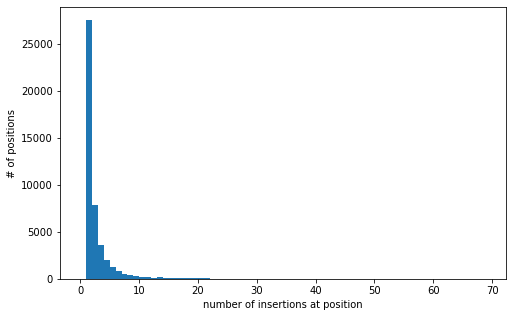

In [168]:
counts = df.value_counts(['scaffold', 'pos'])

plt.figure(figsize=(8,5))
plt.hist(counts, bins=np.arange(0,max(counts),1))
plt.xlabel('number of insertions at position')
plt.ylabel('# of positions')

plt.show()

In [169]:
##10k positions have multiple barcodes inserted at saame spot
counts[counts >= 3]

scaffold  pos    
klchr6    429132     70
klchr1    786749     50
          212734     50
klchr6    2556032    45
          1944418    44
                     ..
kmchr6    31770       3
kmchr5    1238512     3
klchr2    534399      3
kmchr5    351008      3
klchr5    1370251     3
Length: 10138, dtype: int64